In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('training_data.csv')
dataset1=pd.read_csv('test_data.csv')
print(dataset.head())
print(dataset1.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [3]:
x = dataset.iloc[:, 0:132].values
y = dataset.iloc[:, 132].values

In [4]:
x1 = dataset1.iloc[:, 0:132].values
y1 = dataset1.iloc[:, 132].values

# KNEIGHBOURS ALGORITHMS

In [6]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x)
x_test = sc_x.transform(x1)
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)
clf1.fit(x_train, y)
y_pred = clf1.predict(x_test)
print(y_pred)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_pred,y1))
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y1)
print(accuracy*100,"%")

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo' 'Impetigo']
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
97.61904761904762 %


# DECISION TREE ALGORITHM

In [7]:
from sklearn import tree

clf2 = tree.DecisionTreeClassifier() 
clf2 = clf2.fit(x_train,y)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf2.predict(x_test)
print("Decision Tree")
print("Accuracy")
print(accuracy_score(y_pred, y1))
#print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_pred,y1)
print(conf_matrix)

Decision Tree
Accuracy
0.9761904761904762
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


# RANDOM FOREST

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=100)
clf3 = clf3.fit(x,np.ravel(y))

# calculating accuracy 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf3.predict(x_test)
print("Random Forest")
print("Accuracy")
print(accuracy_score(y_pred, y1))
#print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_pred,y1)
print(conf_matrix)

Random Forest
Accuracy
0.9761904761904762
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


# NAIVE BAYES

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(x,np.ravel(y))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=gnb.predict(x_test)
print("Naive Bayes")
print("Accuracy")
print(accuracy_score(y_pred, y1))
#print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_pred,y1)
print(conf_matrix)


Naive Bayes
Accuracy
0.9761904761904762
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


accuracy is : 97.61904761904762


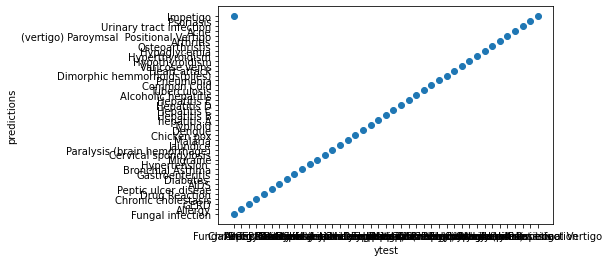

In [10]:
print('accuracy is :',accuracy_score(y_pred, y1)*100)

plt.scatter(y1, y_pred)
plt.xlabel('ytest')
plt.ylabel('predictions')
plt.show()

In [11]:
import pickle

In [12]:
pickle.dump(clf1,open('model1.pkl','wb'))
pickle.dump(clf2,open('model2.pkl','wb'))
pickle.dump(clf3,open('model3.pkl','wb'))
pickle.dump(gnb,open('model4.pkl','wb'))